In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

brcan = load_breast_cancer()

In [7]:
X = brcan.data
y = brcan.target

lda = LinearDiscriminantAnalysis()
lda.fit(X,y)

xlda = lda.transform(X)
xt1,xt2,yt1,yt2 = train_test_split(xlda,y,test_size=0.2,random_state=42)

lr = LogisticRegression()
lr.fit(xt1,yt1)

LogisticRegression()

In [8]:
y_pred = lr.predict(xt2)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(yt2, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.97


In [9]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(yt2, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[41  2]
 [ 1 70]]


In [10]:
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(yt2, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



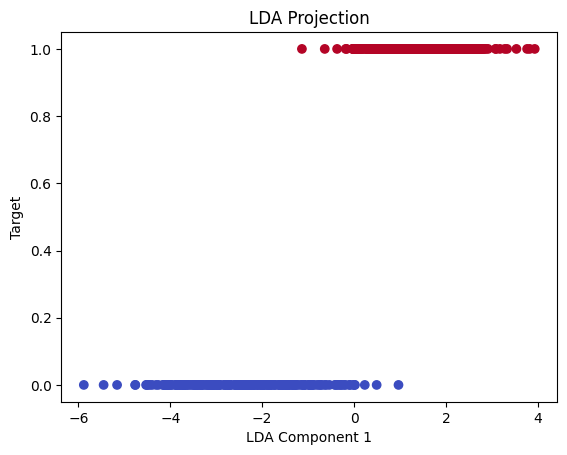

In [11]:
import matplotlib.pyplot as plt

plt.scatter(xlda[:,0], y, c=y, cmap='coolwarm')
plt.xlabel('LDA Component 1')
plt.ylabel('Target')
plt.title('LDA Projection')
plt.show()


✅ Accuracy: 0.83

✅ Confusion Matrix:
 [[70 19]
 [14 97]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        89
           1       0.84      0.87      0.85       111

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



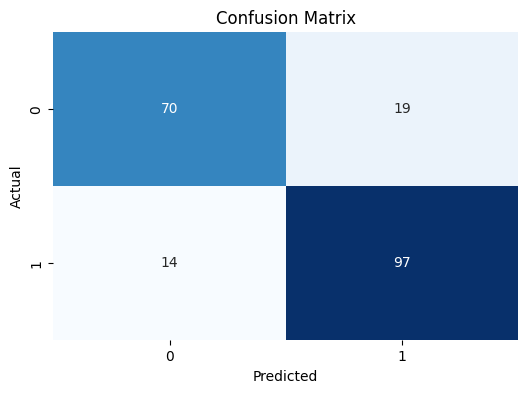

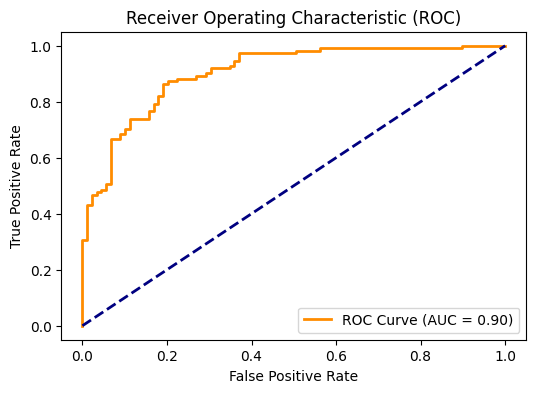

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier as sgd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# ✅ Step 1: Generate synthetic dataset
X, y = make_classification(
    n_samples=1000, 
    n_features=10, 
    n_classes=2, 
    random_state=42
)

# ✅ Step 2: Split data
xt1, xt2, yt1, yt2 = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

# ✅ Step 3: Train SGD classifier
clf = sgd(
    loss='log_loss', 
    penalty='l2', 
    alpha=0.0001, 
    max_iter=1000, 
    tol=1e-3, 
    random_state=42
)
clf.fit(xt1, yt1)

# ✅ Step 4: Predictions
y_pred = clf.predict(xt2)
y_proba = clf.predict_proba(xt2)[:, 1]  # Probabilities for class 1

# ✅ Step 5: Metrics
accuracy = accuracy_score(yt2, y_pred)
cm = confusion_matrix(yt2, y_pred)
report = classification_report(yt2, y_pred)

print(f"✅ Accuracy: {accuracy:.2f}")
print("\n✅ Confusion Matrix:\n", cm)
print("\n✅ Classification Report:\n", report)

# ✅ Step 6: Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ✅ Step 7: ROC Curve
fpr, tpr, thresholds = roc_curve(yt2, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


✅ Accuracy: 0.83

✅ Confusion Matrix:
 [[70 19]
 [14 97]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        89
           1       0.84      0.87      0.85       111

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



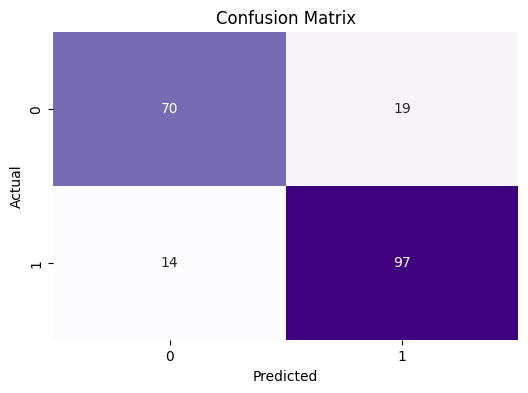

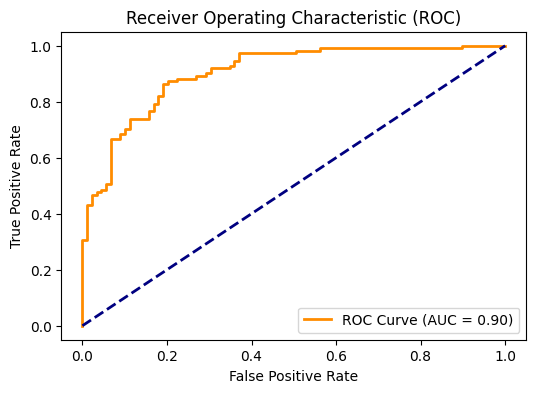

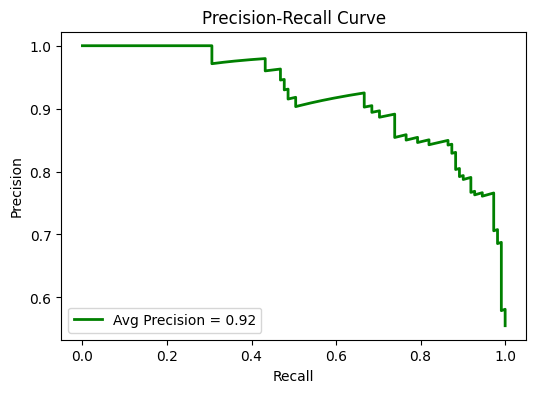

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier as sgd
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_curve, auc, precision_recall_curve, average_precision_score
)

# Step 1: Generate dataset
X, y = make_classification(
    n_samples=1000, 
    n_features=10, 
    n_classes=2, 
    random_state=42
)

# Step 2: Split data
xt1, xt2, yt1, yt2 = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

# Step 3: Train model
clf = sgd(
    loss='log_loss', 
    penalty='l2', 
    alpha=0.0001, 
    max_iter=1000, 
    tol=1e-3, 
    random_state=42
)
clf.fit(xt1, yt1)

# Step 4: Predictions
y_pred = clf.predict(xt2)
y_proba = clf.predict_proba(xt2)[:, 1]

# Step 5: Metrics
accuracy = accuracy_score(yt2, y_pred)
cm = confusion_matrix(yt2, y_pred)
report = classification_report(yt2, y_pred)

print(f"✅ Accuracy: {accuracy:.2f}")
print("\n✅ Confusion Matrix:\n", cm)
print("\n✅ Classification Report:\n", report)

# Step 6: Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 7: ROC Curve
fpr, tpr, _ = roc_curve(yt2, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# Step 8: Precision-Recall Curve
precision, recall, _ = precision_recall_curve(yt2, y_proba)
avg_precision = average_precision_score(yt2, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='green', lw=2, label=f'Avg Precision = {avg_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()
